## Task

### Part 1 (Include until 4.)

### 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [4]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# Import data set

path = r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Instacart Basket Analysis'

instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merge.pkl'))

### 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [7]:
instacart.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,dependants,marital_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.800781,389851,709,2,0,21,...,Frequent customer,Deborah,Glass,Female,Vermont,66,2018-06-16,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.800781,652770,764,1,3,13,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2020-02-09,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.800781,1813452,764,3,4,17,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2020-02-09,3,married,31308


##### Columns 'first_name' and 'last_name' could potentially be traced back to a particular person. Next coul be to inform a senior colleague or whoever is responsible for data security. In this exercise and memorywise reasons I  choose to delete them.

In [9]:
# Drop PPI columns

instacart.drop(columns=['first_name', 'last_name'], inplace=True)

### 3.The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

    Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)


In [11]:
# Check 'State' column

instacart['state'].value_counts()

state
Pennsylvania            667007
California              659695
Rhode Island            656777
Georgia                 656249
New Mexico              654400
Arizona                 653864
North Carolina          651790
Oklahoma                651661
Alaska                  648451
Minnesota               647738
Massachusetts           646275
Wyoming                 644191
Virginia                641280
Missouri                640576
Texas                   640285
Colorado                639173
Maine                   638479
North Dakota            638391
Alabama                 637863
Kansas                  637418
Louisiana               637414
Delaware                636906
South Carolina          636677
Oregon                  636332
Arkansas                636070
Nevada                  636034
New York                635912
Montana                 635181
South Dakota            633649
Illinois                632928
Hawaii                  632786
Washington              632722
Mi

In [12]:
instacart['state'].nunique()

51

In [13]:
# Create list for each Region

northeast_states = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']
midwest_states = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
south_states = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
west_states = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']


In [14]:
# Create new column

instacart.loc[instacart['state'].isin(northeast_states), 'region'] = 'Northeast'
instacart.loc[instacart['state'].isin(midwest_states), 'region'] = 'Midwest'
instacart.loc[instacart['state'].isin(south_states), 'region'] = 'South'
instacart.loc[instacart['state'].isin(west_states), 'region'] = 'West'

In [15]:
instacart['region'] = instacart['region'].astype('category')

In [16]:
# Check new column

instacart['region'].value_counts()

region
South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: count, dtype: int64

In [17]:
# Crossing the variables

pd.crosstab(instacart['region'], instacart['spending_flag'], dropna = False)

spending_flag,High spender,Low spender
region,,
Midwest,29265,7566800
Northeast,18639,5703253
South,40577,10749519
West,31238,8260441


In [18]:
# Crossing both categories in 'spending_flag' to create two visualizations since values are too dispersed to be properly appreciated

low_spender_data = instacart[instacart['spending_flag'] == 'Low spender']
high_spender_data = instacart[instacart['spending_flag'] == 'High spender']

low_spender_cross_tab = pd.crosstab(low_spender_data['region'], low_spender_data['spending_flag'])
high_spender_cross_tab = pd.crosstab(high_spender_data['region'], high_spender_data['spending_flag'])

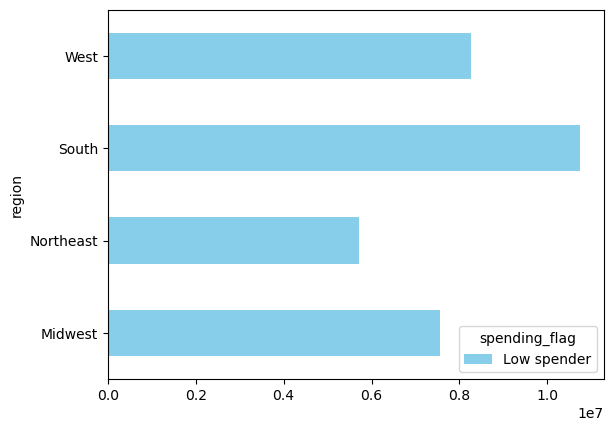

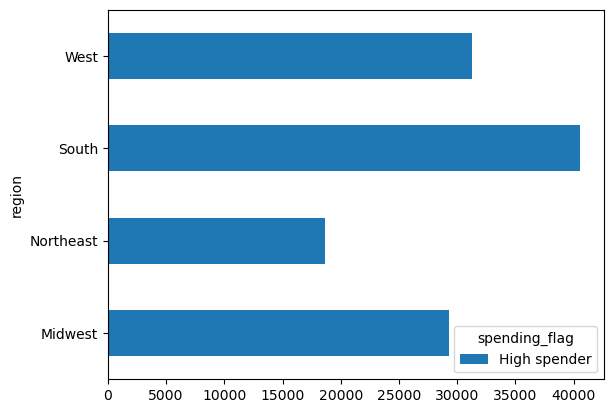

In [19]:
barchart1 = low_spender_cross_tab.plot(kind='barh', color='skyblue')
barchart2 = high_spender_cross_tab.plot(kind='barh')

In [20]:
barchart1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'low_spender_by_region.png'))

In [21]:
barchart2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'high_spender_by_region.png'))

### 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [23]:
# Create exclusion flag

instacart['low_activity_customer'] = instacart['max_order'] < 5

In [24]:
# Check column

instacart.head()[['max_order', 'low_activity_customer']]

,max_order,low_activity_customer
0,32,False
1,32,False
2,5,False
3,3,True
4,3,True


In [25]:
instacart['low_activity_customer'].value_counts(dropna = False)

low_activity_customer
False    30959687
True      1440045
Name: count, dtype: int64

In [44]:
# Create subset

instacart_high_activity = instacart[instacart['low_activity_customer'] == False]

In [46]:
#Export subset

instacart_high_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_final.pkl'))